GRAPHS_GENERATION

    Dataset        Probe     Min     Max     Mean      Std Index
0  20240501  klin_91D0_1  1039.0  1305.0  1130.95  56.5778   B02
1  20240501  klin_91D0_2  1035.0  1196.0  1092.19  32.6371   B02
2  20240501  klin_91D0_1  1188.0  1642.0  1341.82  83.4092   B03
3  20240501  klin_91D0_2  1204.0  1439.0  1317.51  41.0617   B03
4  20240501  klin_91D0_1  1118.0  1534.0  1236.86  78.3128   B04


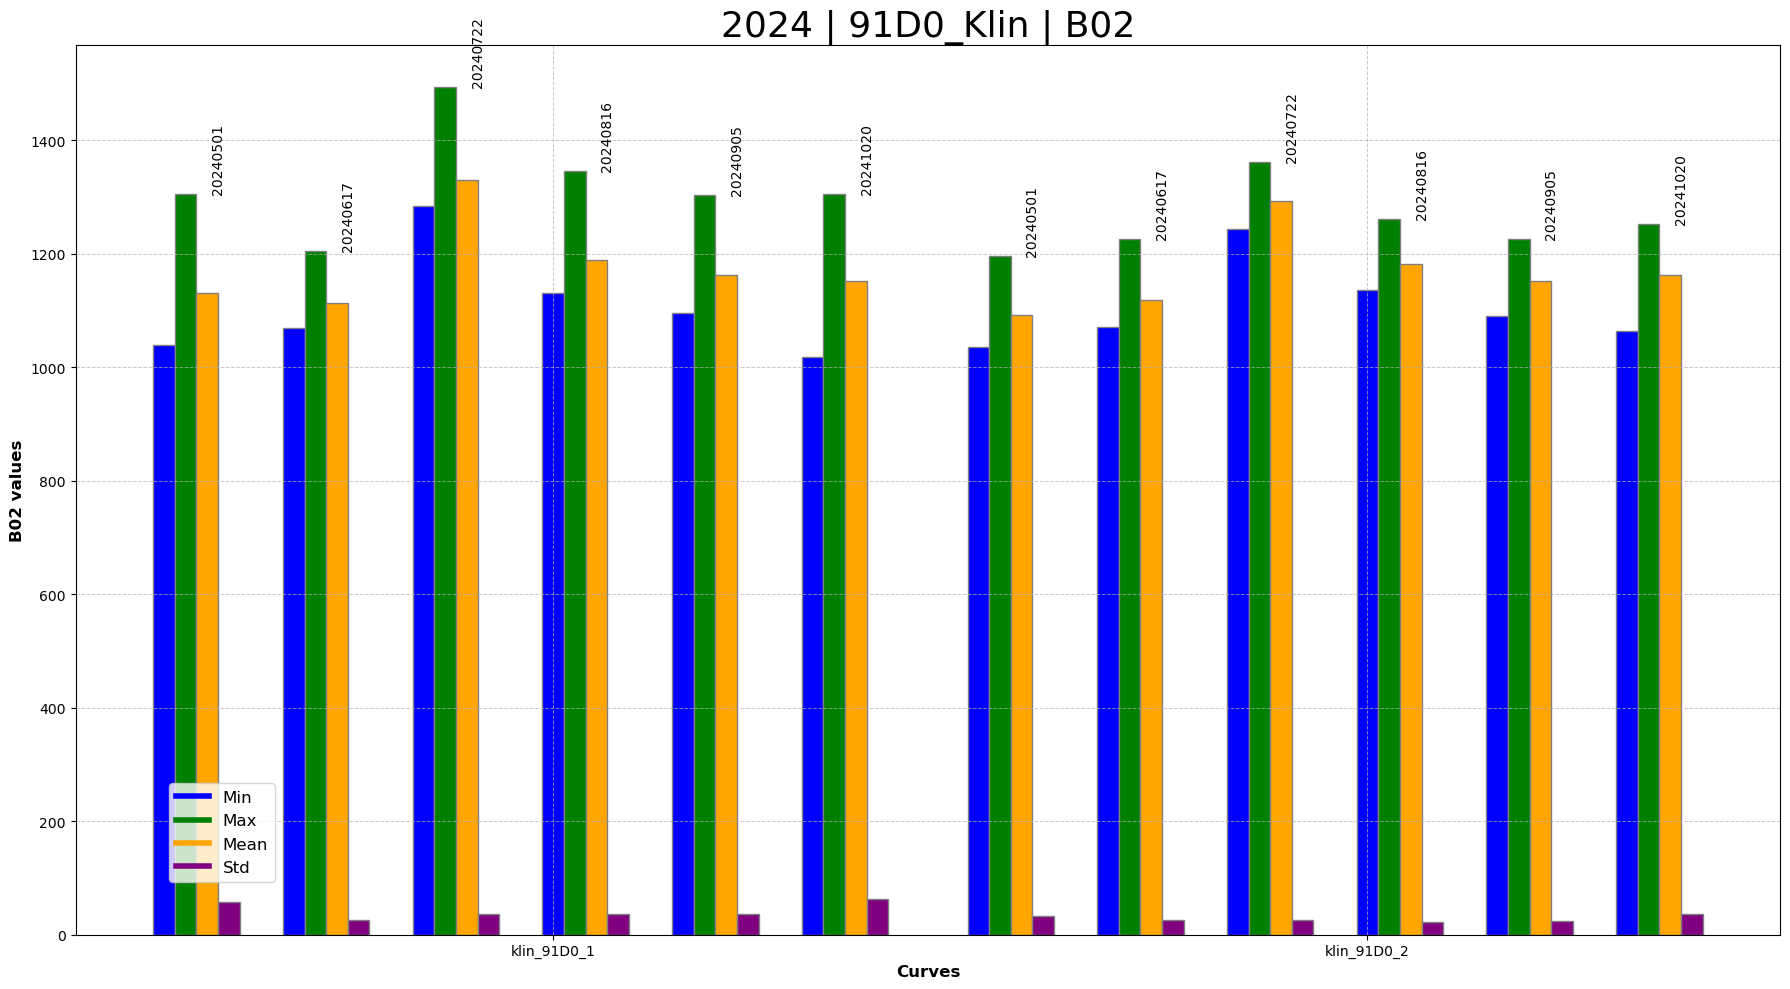

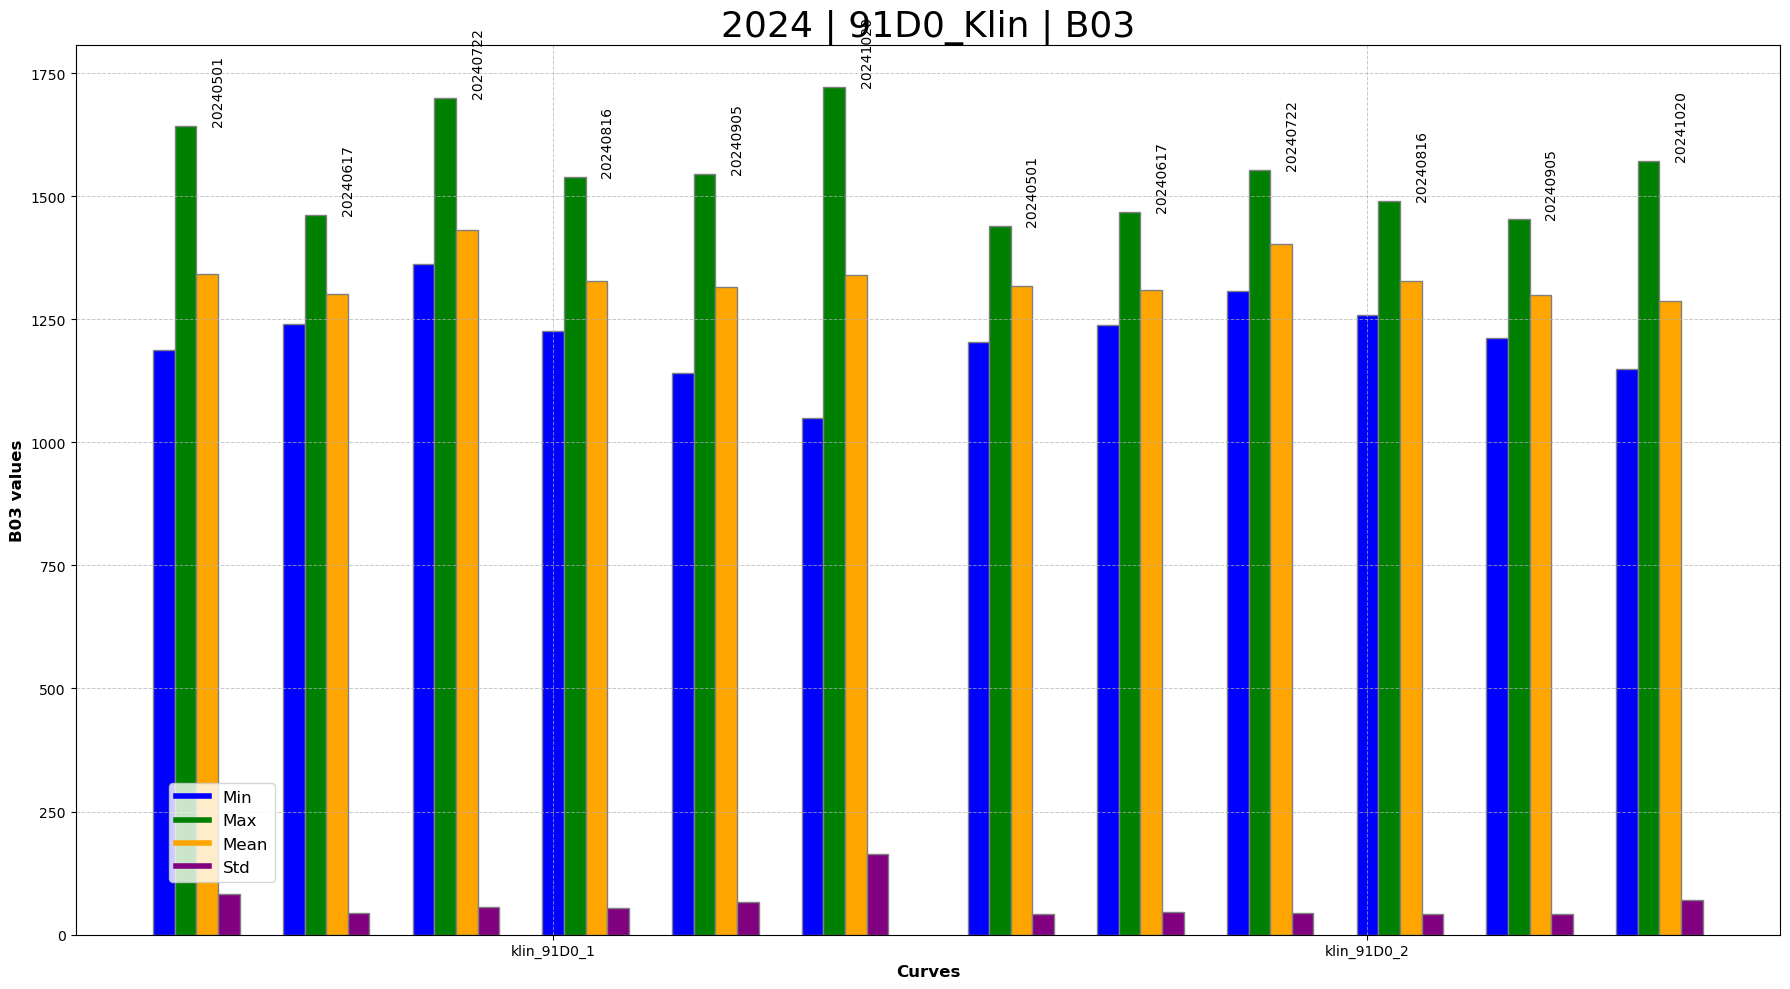

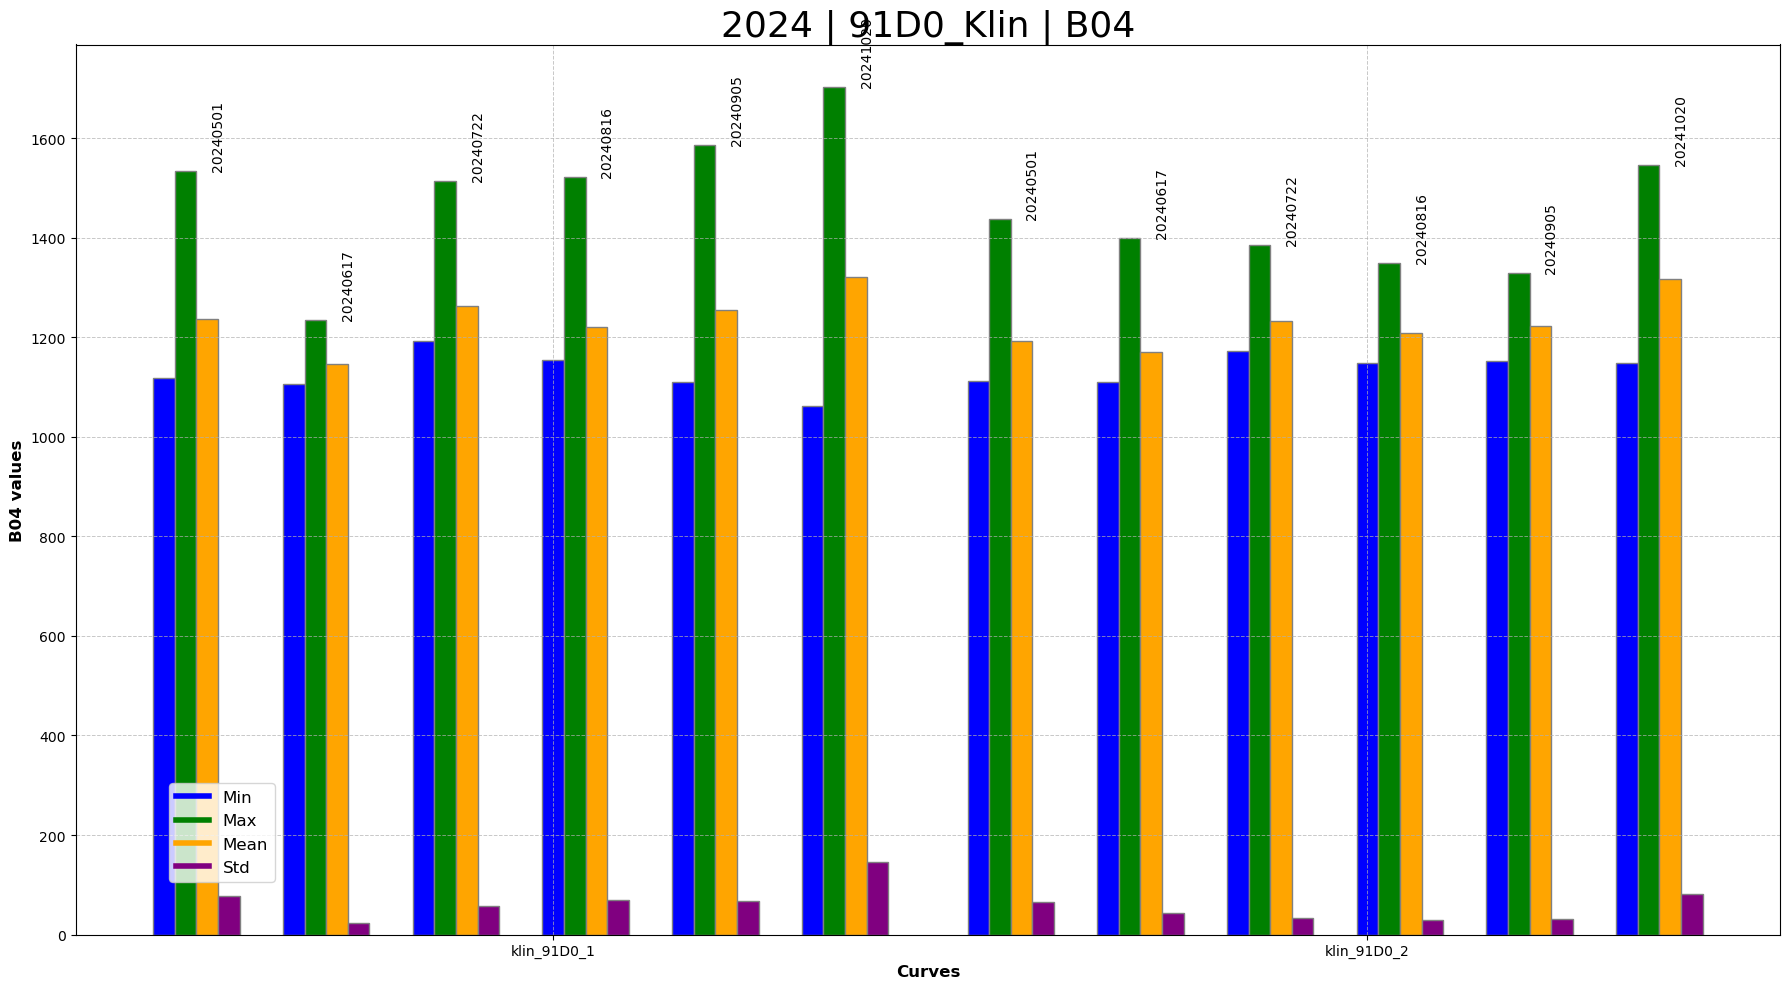

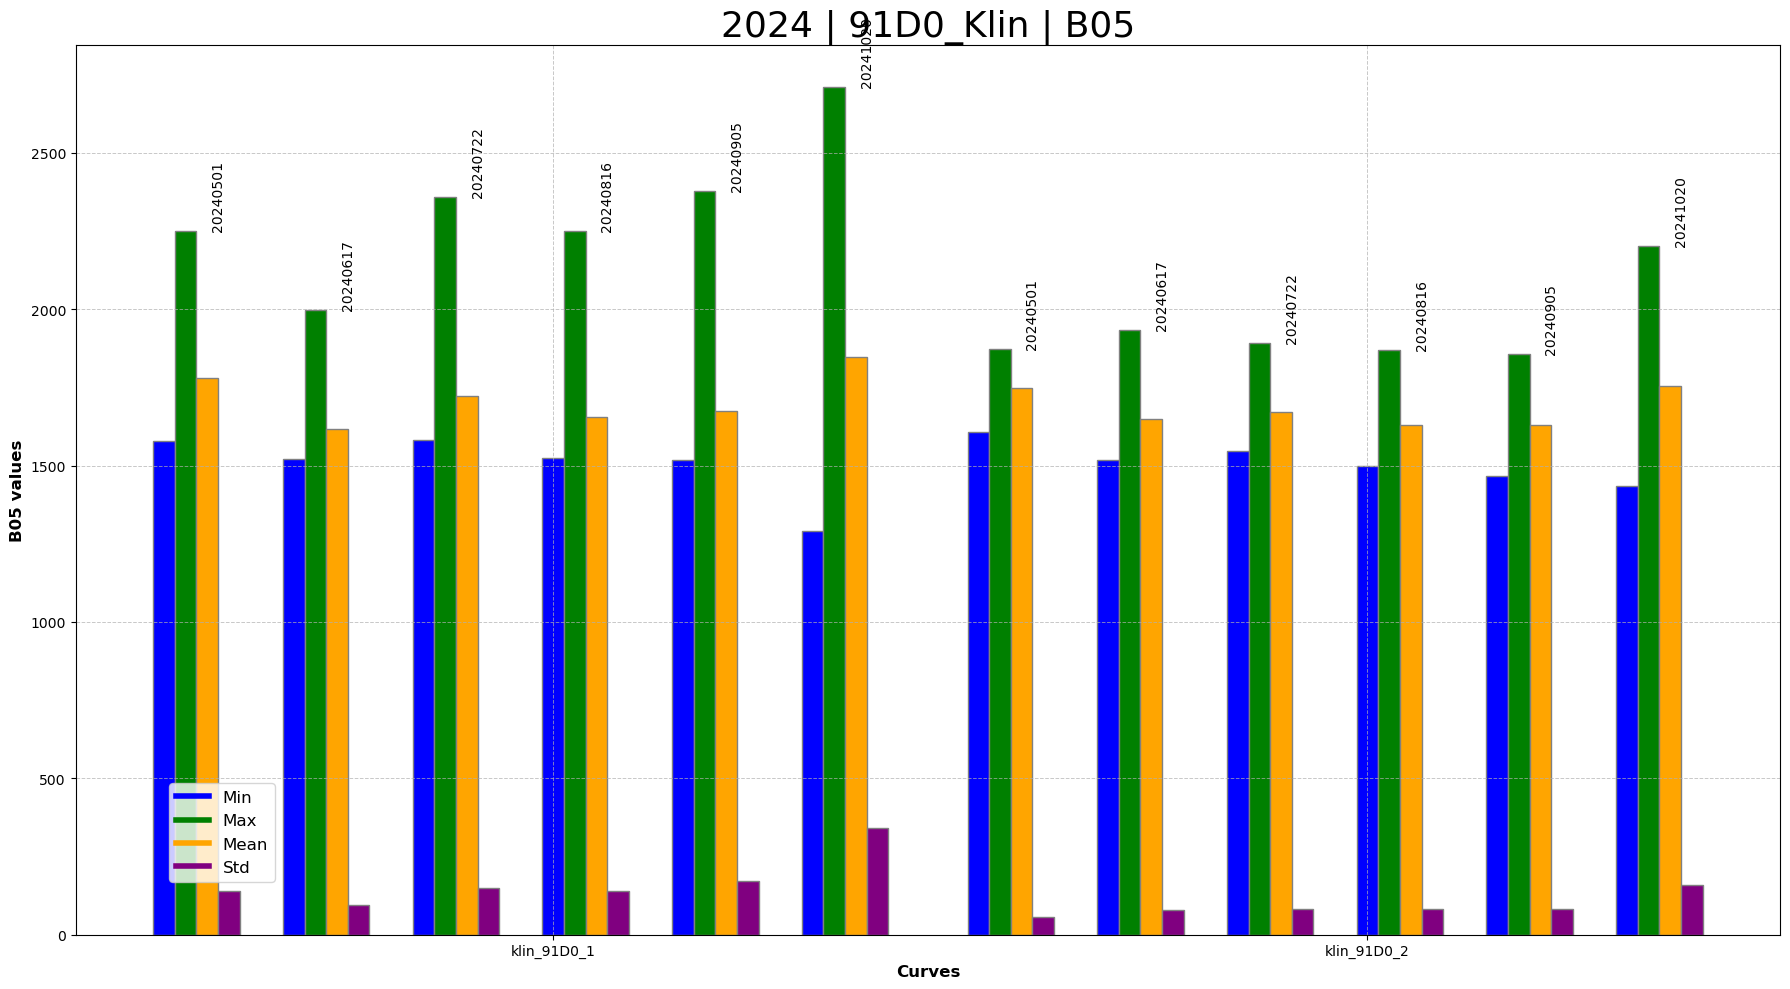

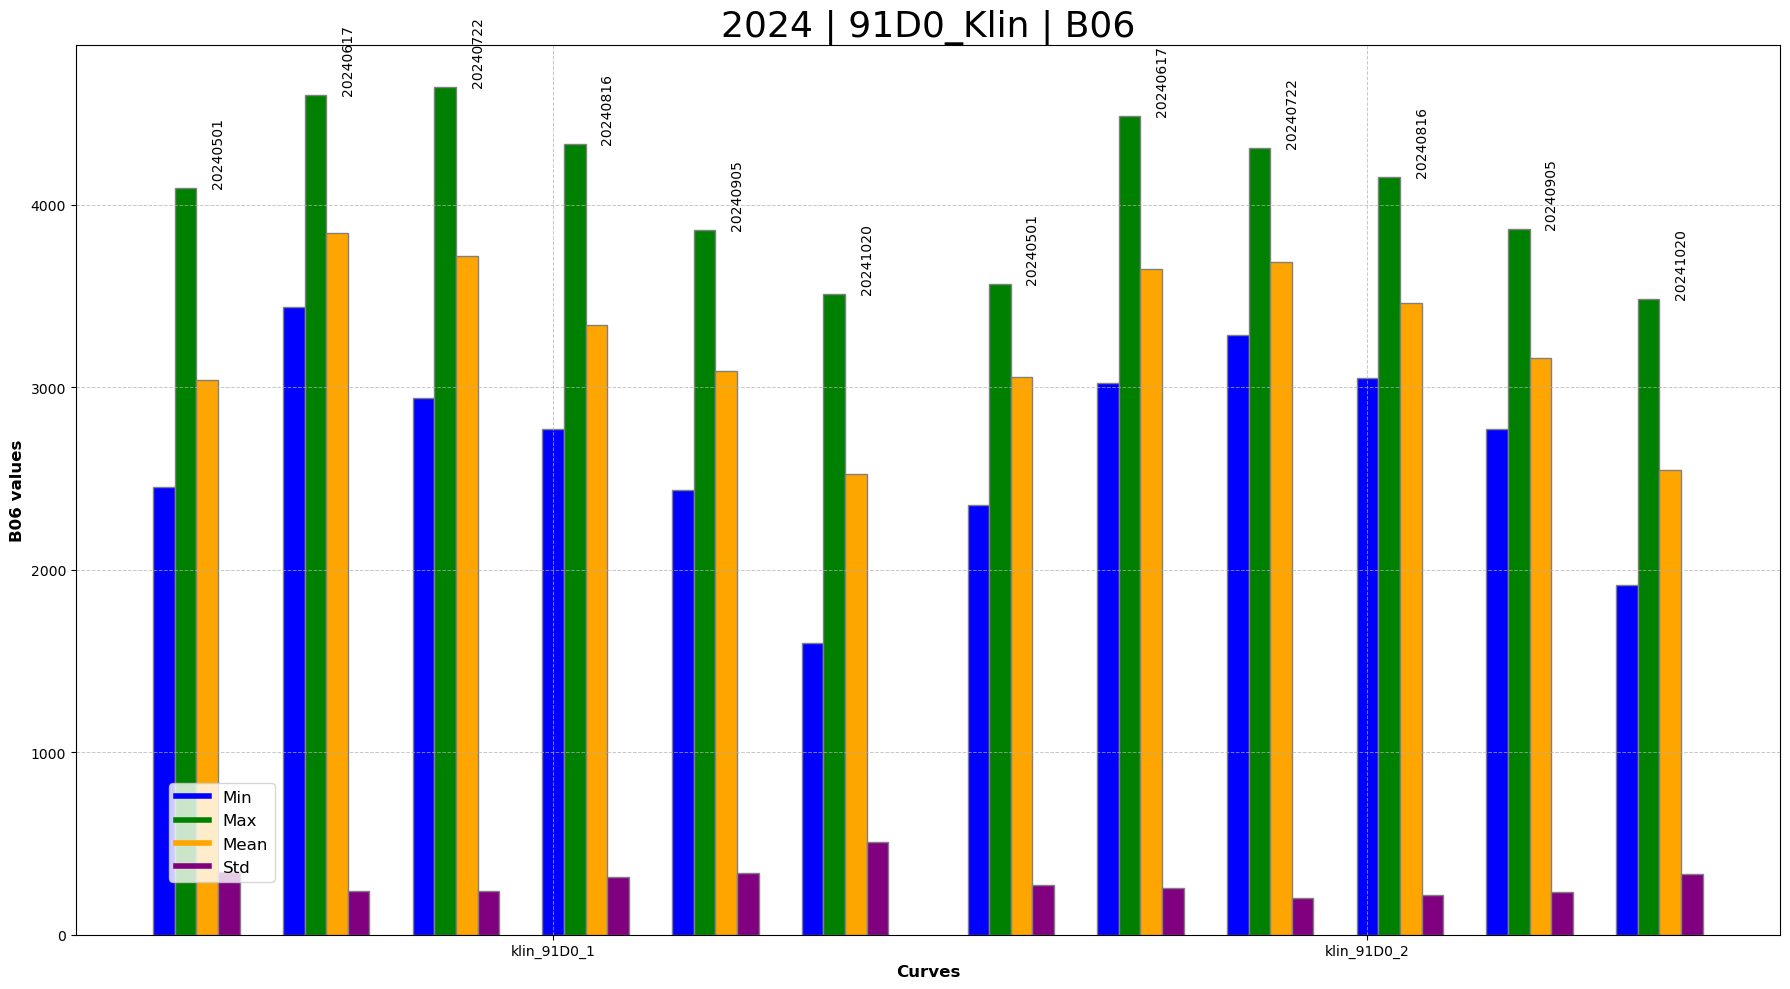

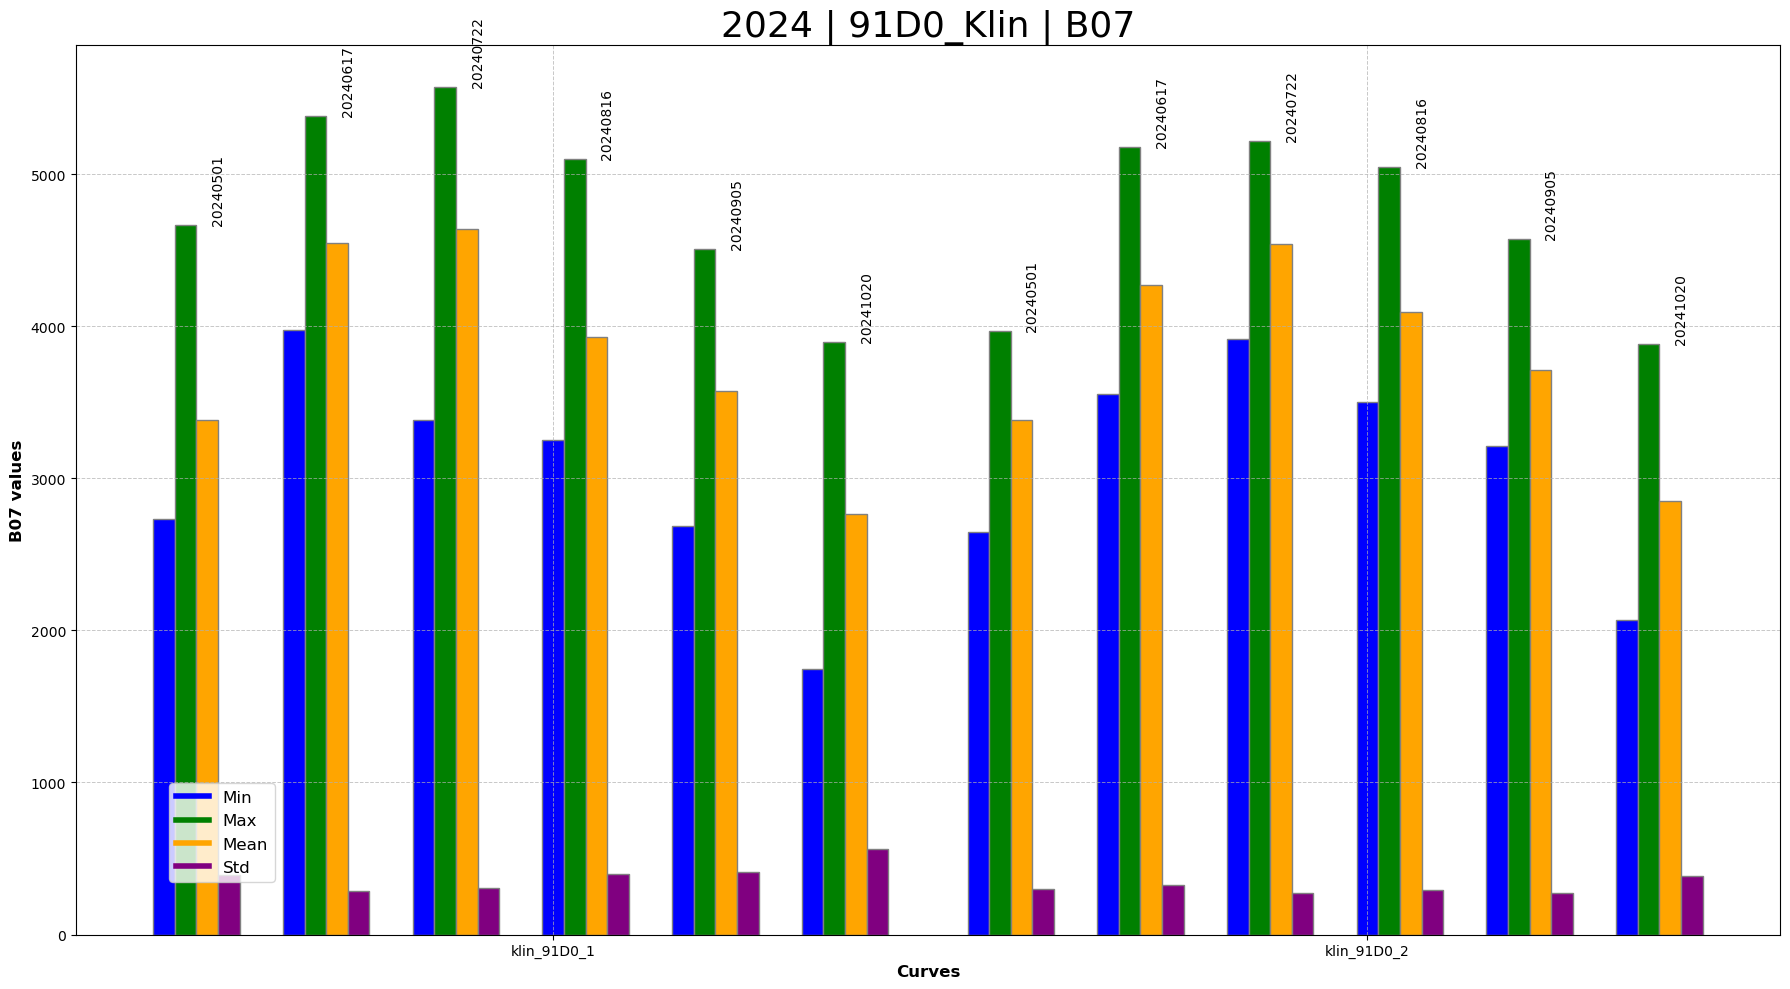

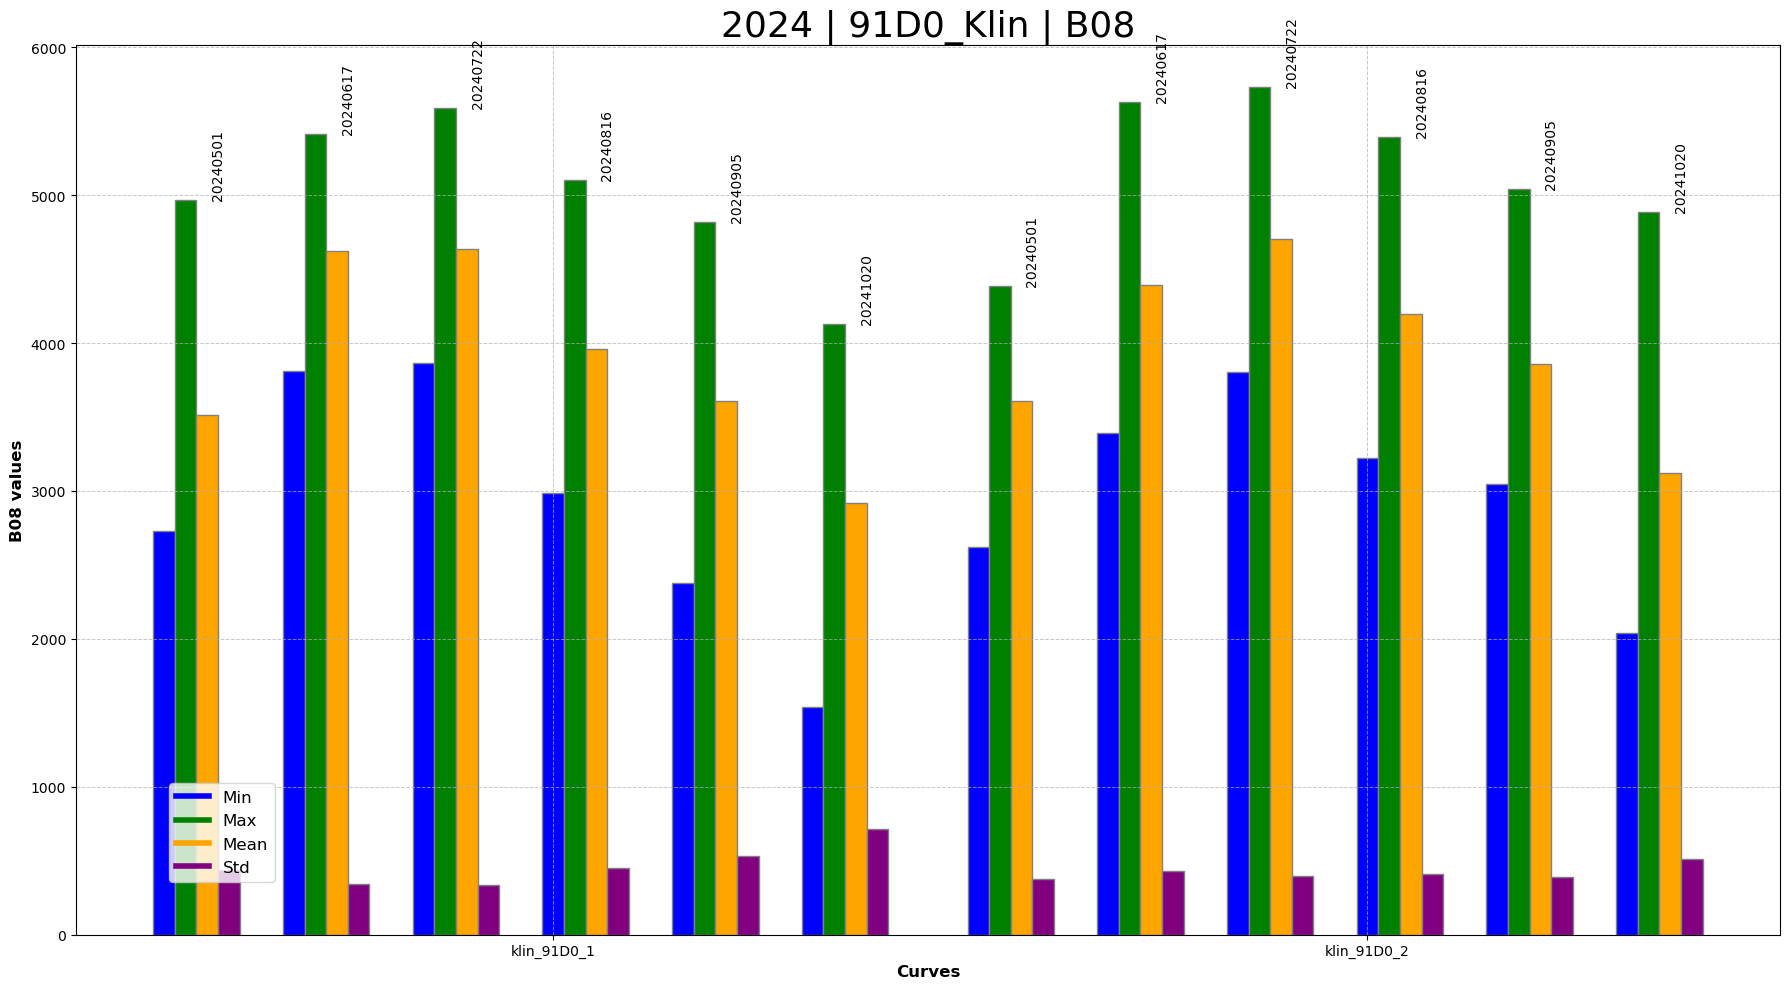

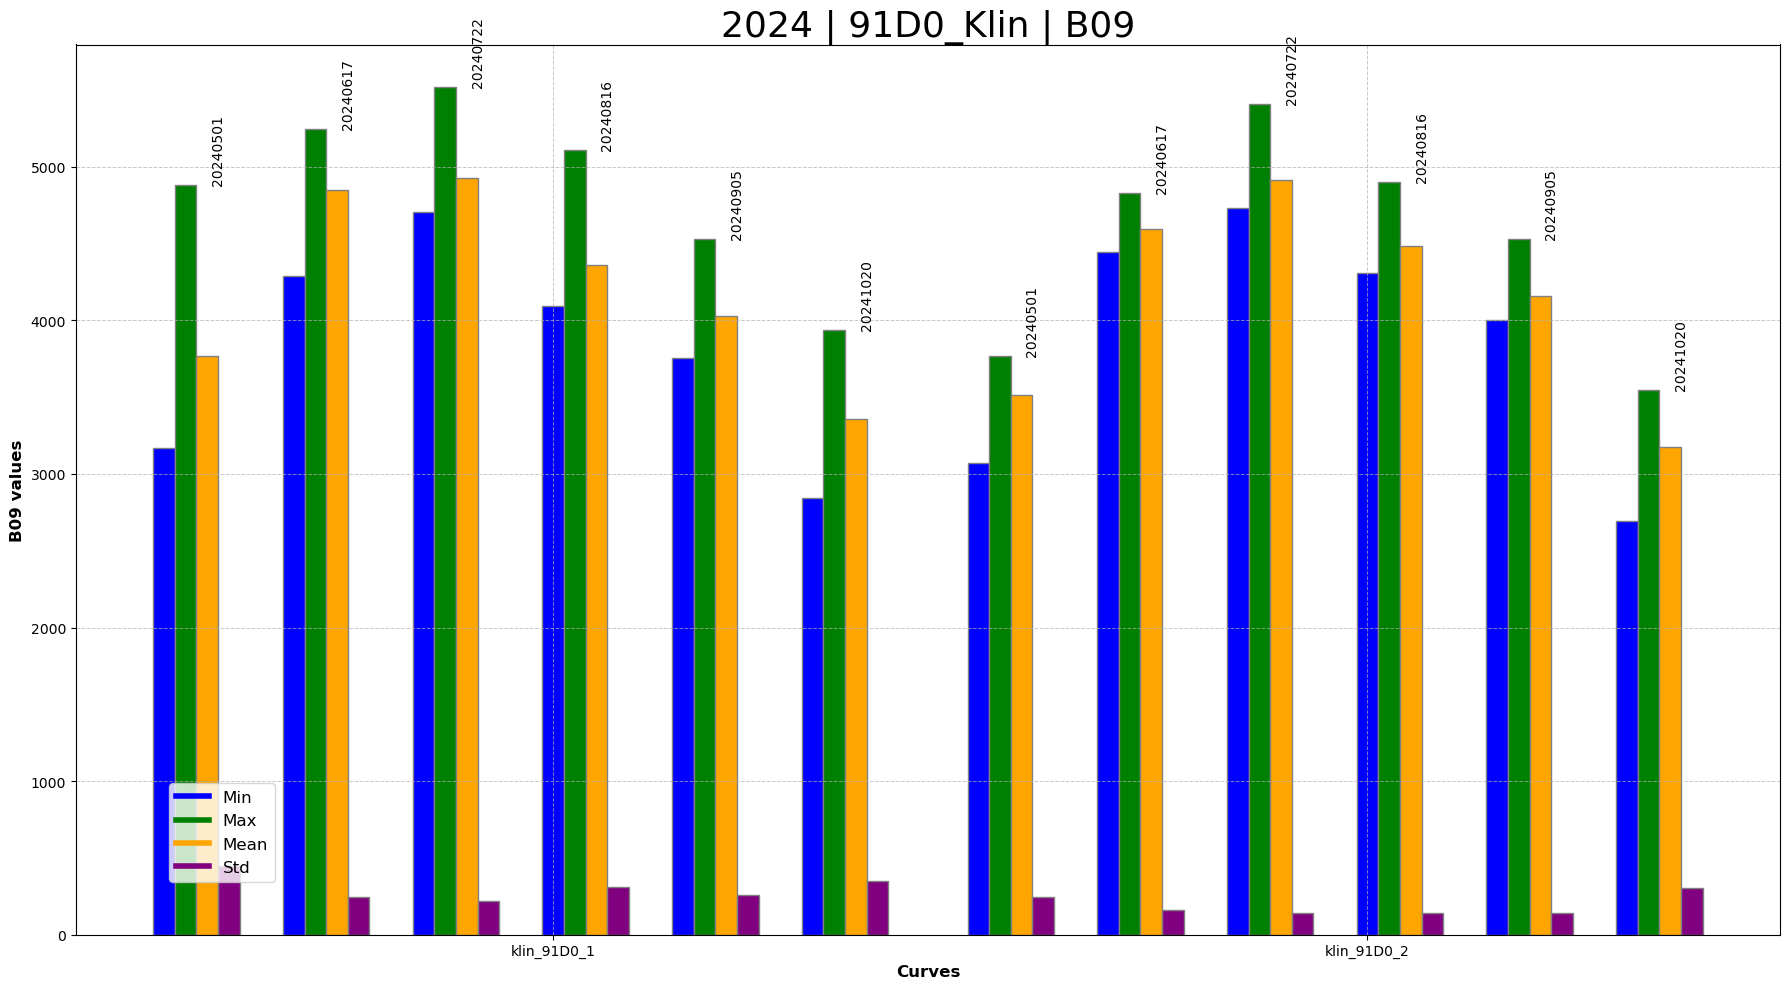

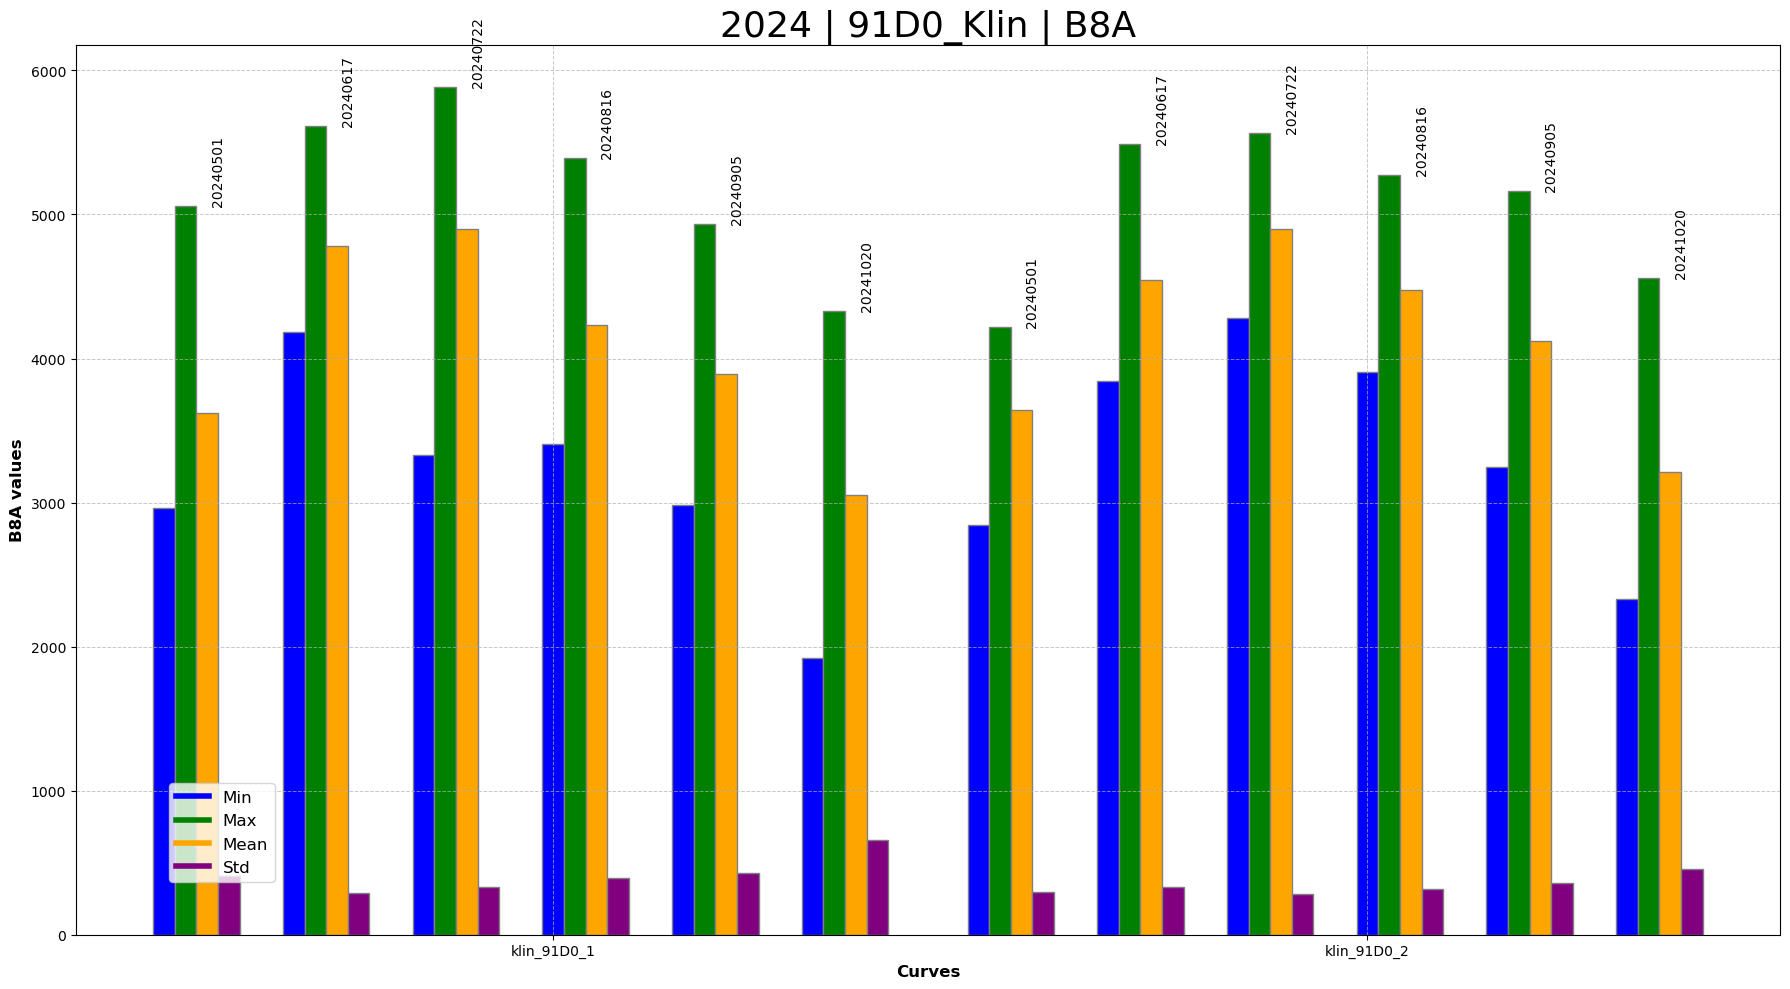

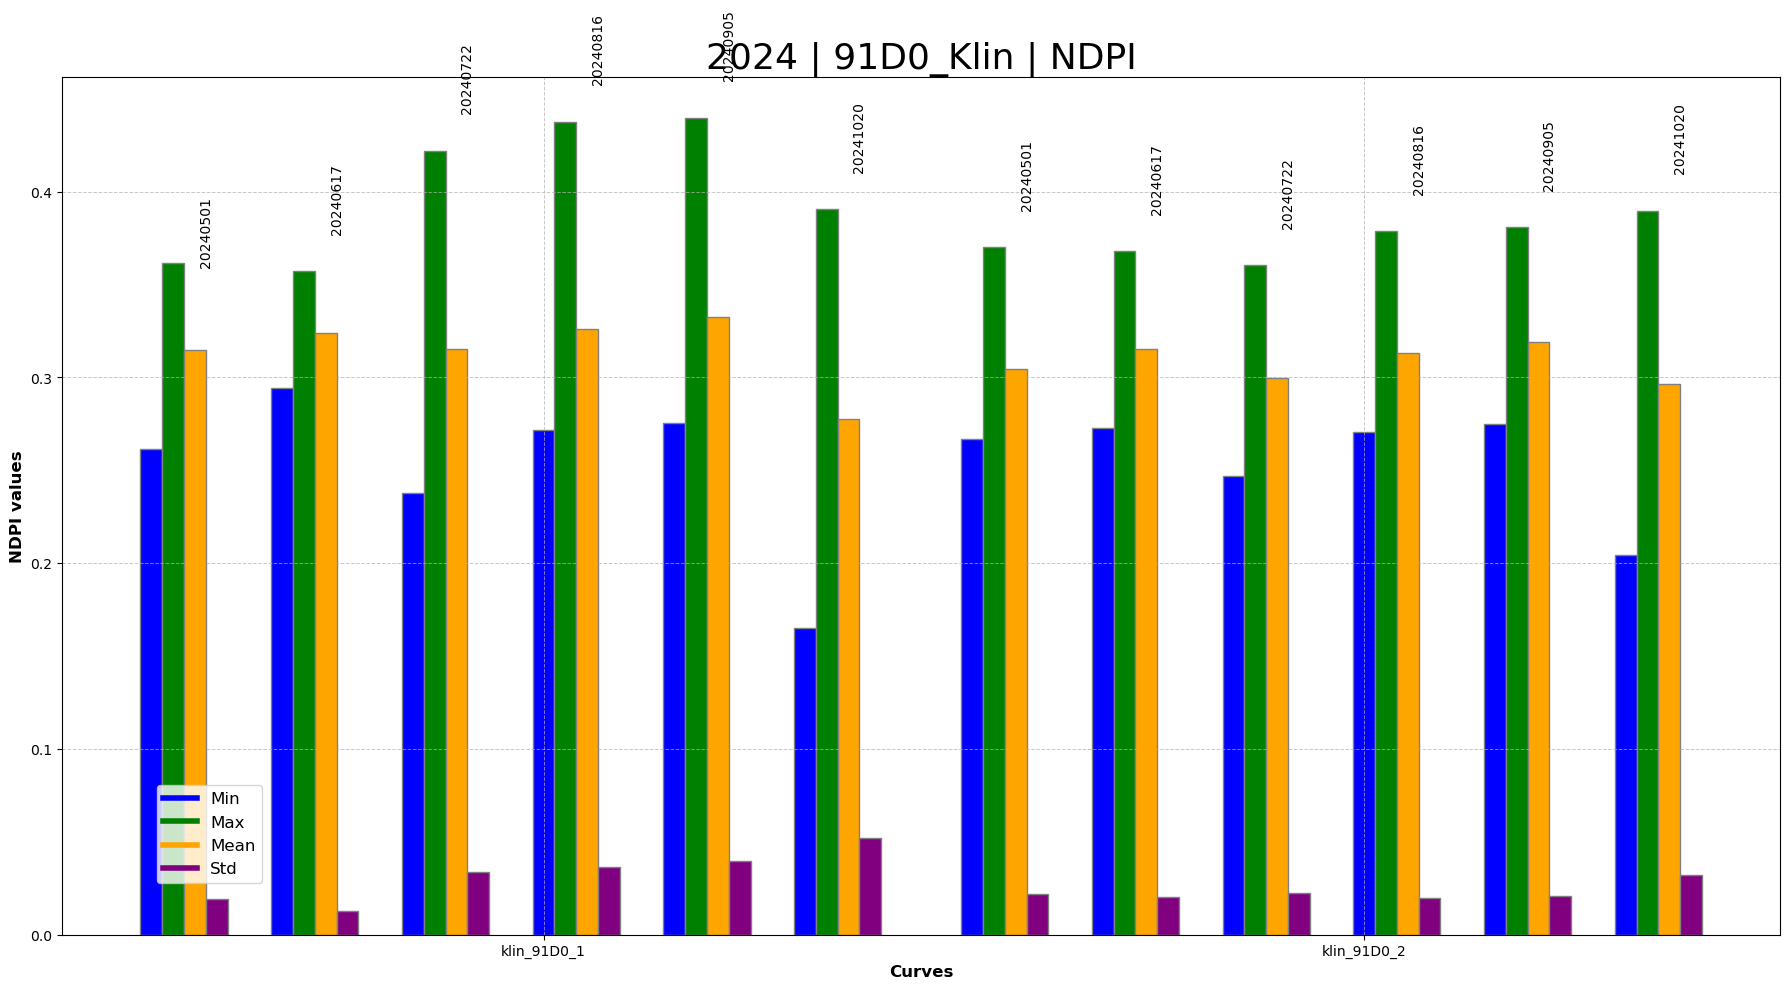

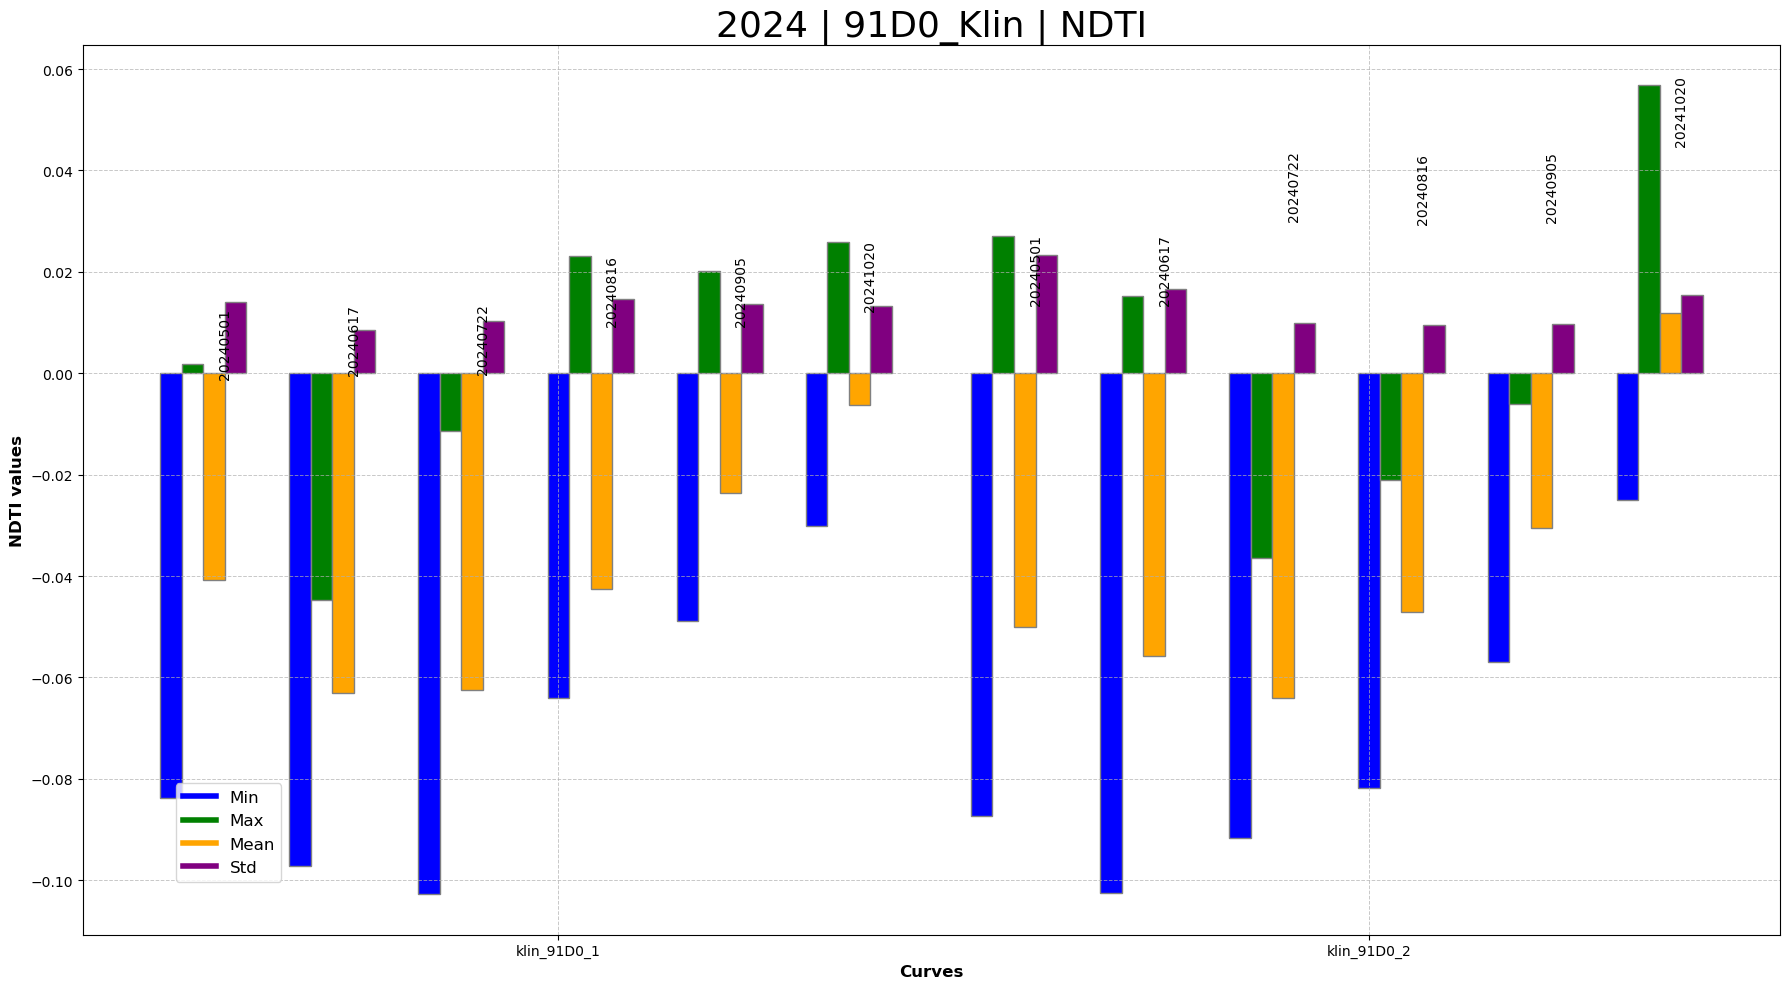

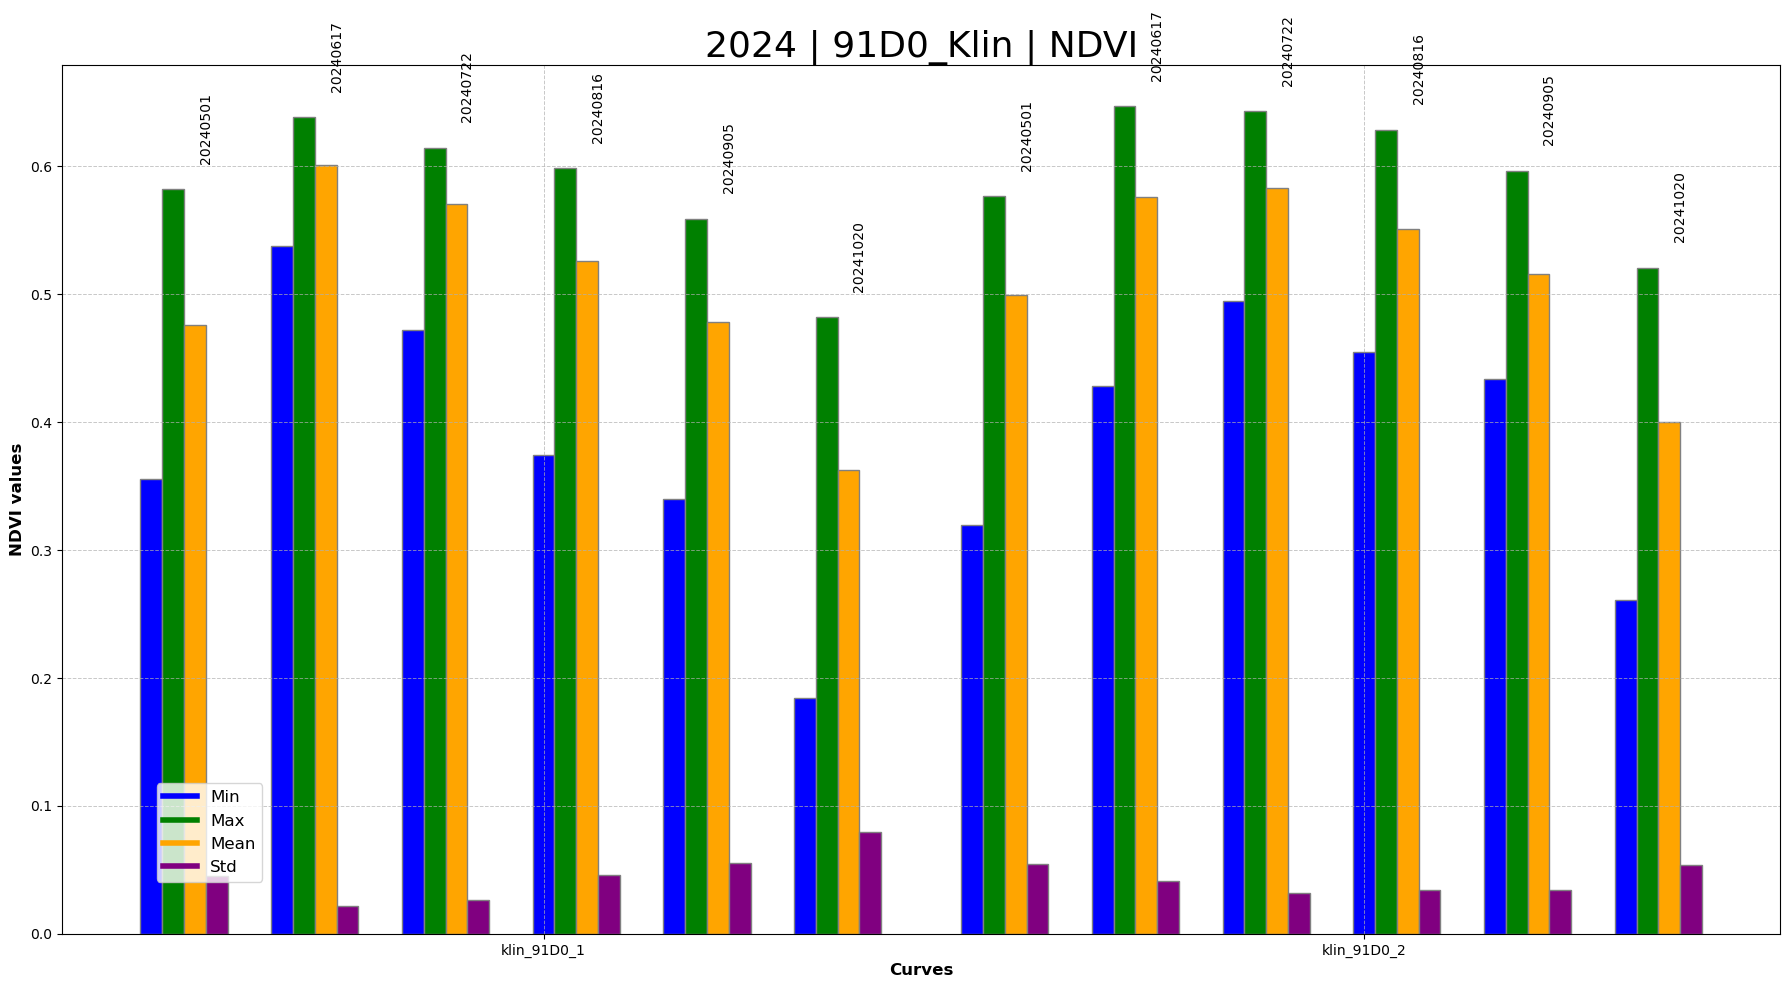

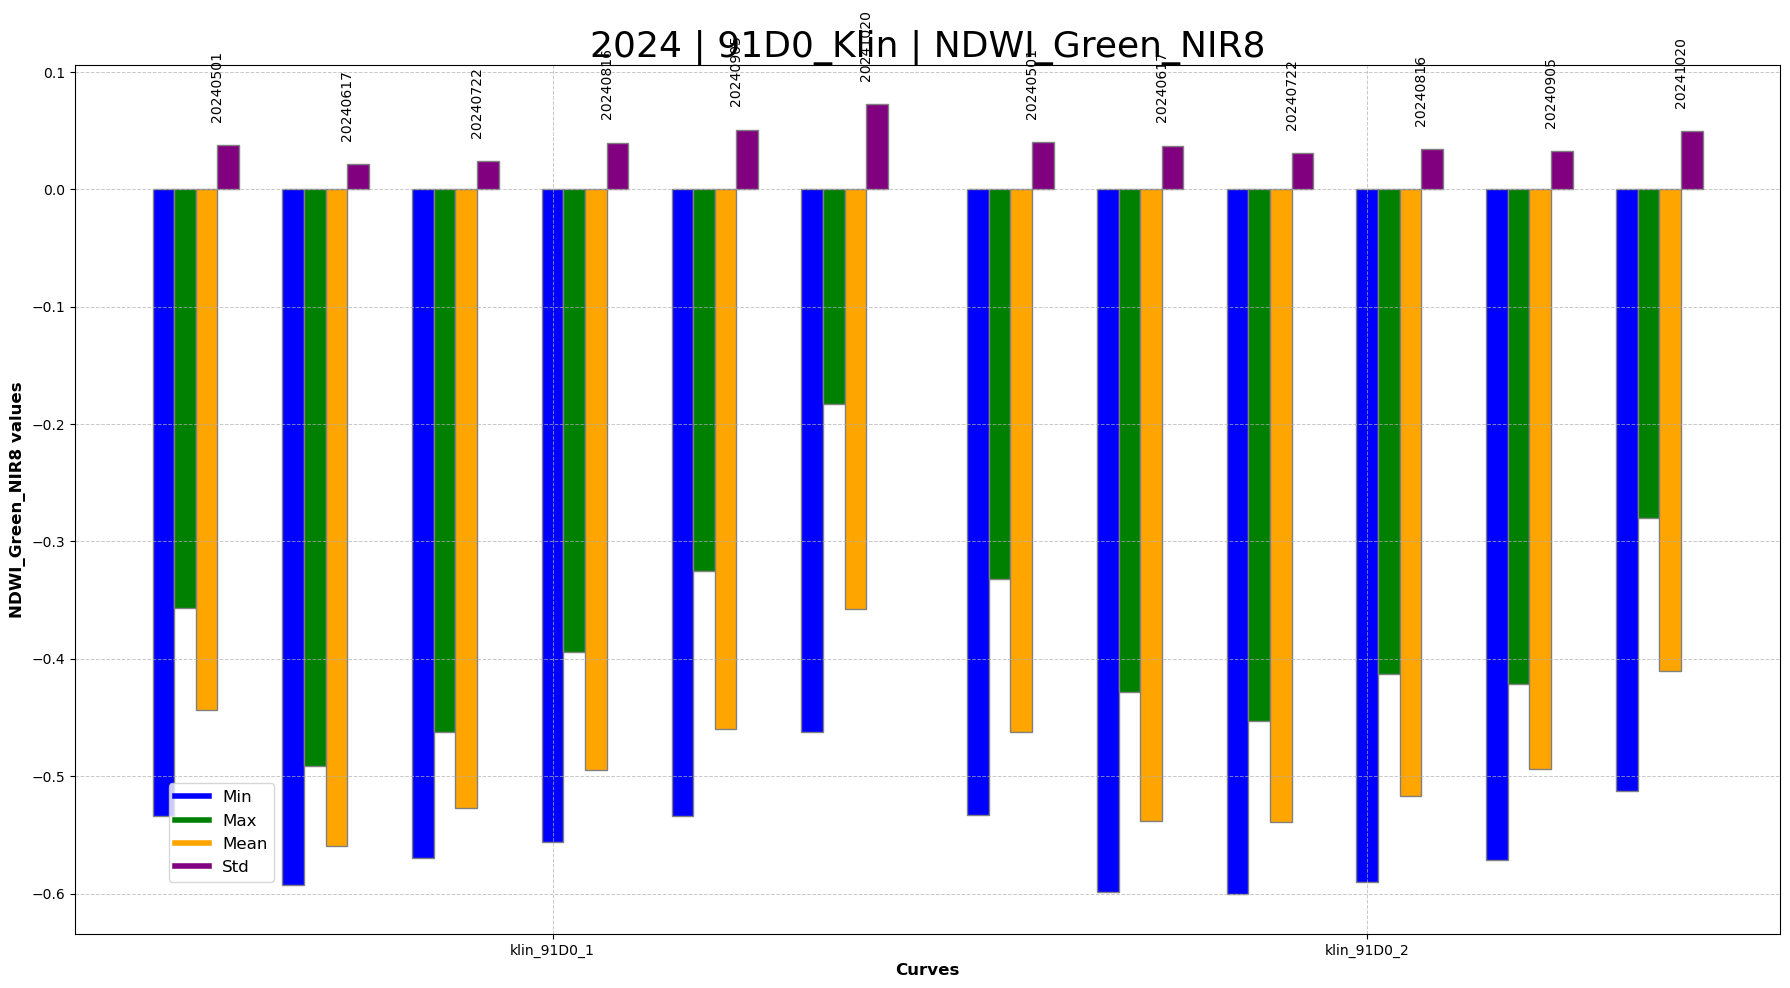

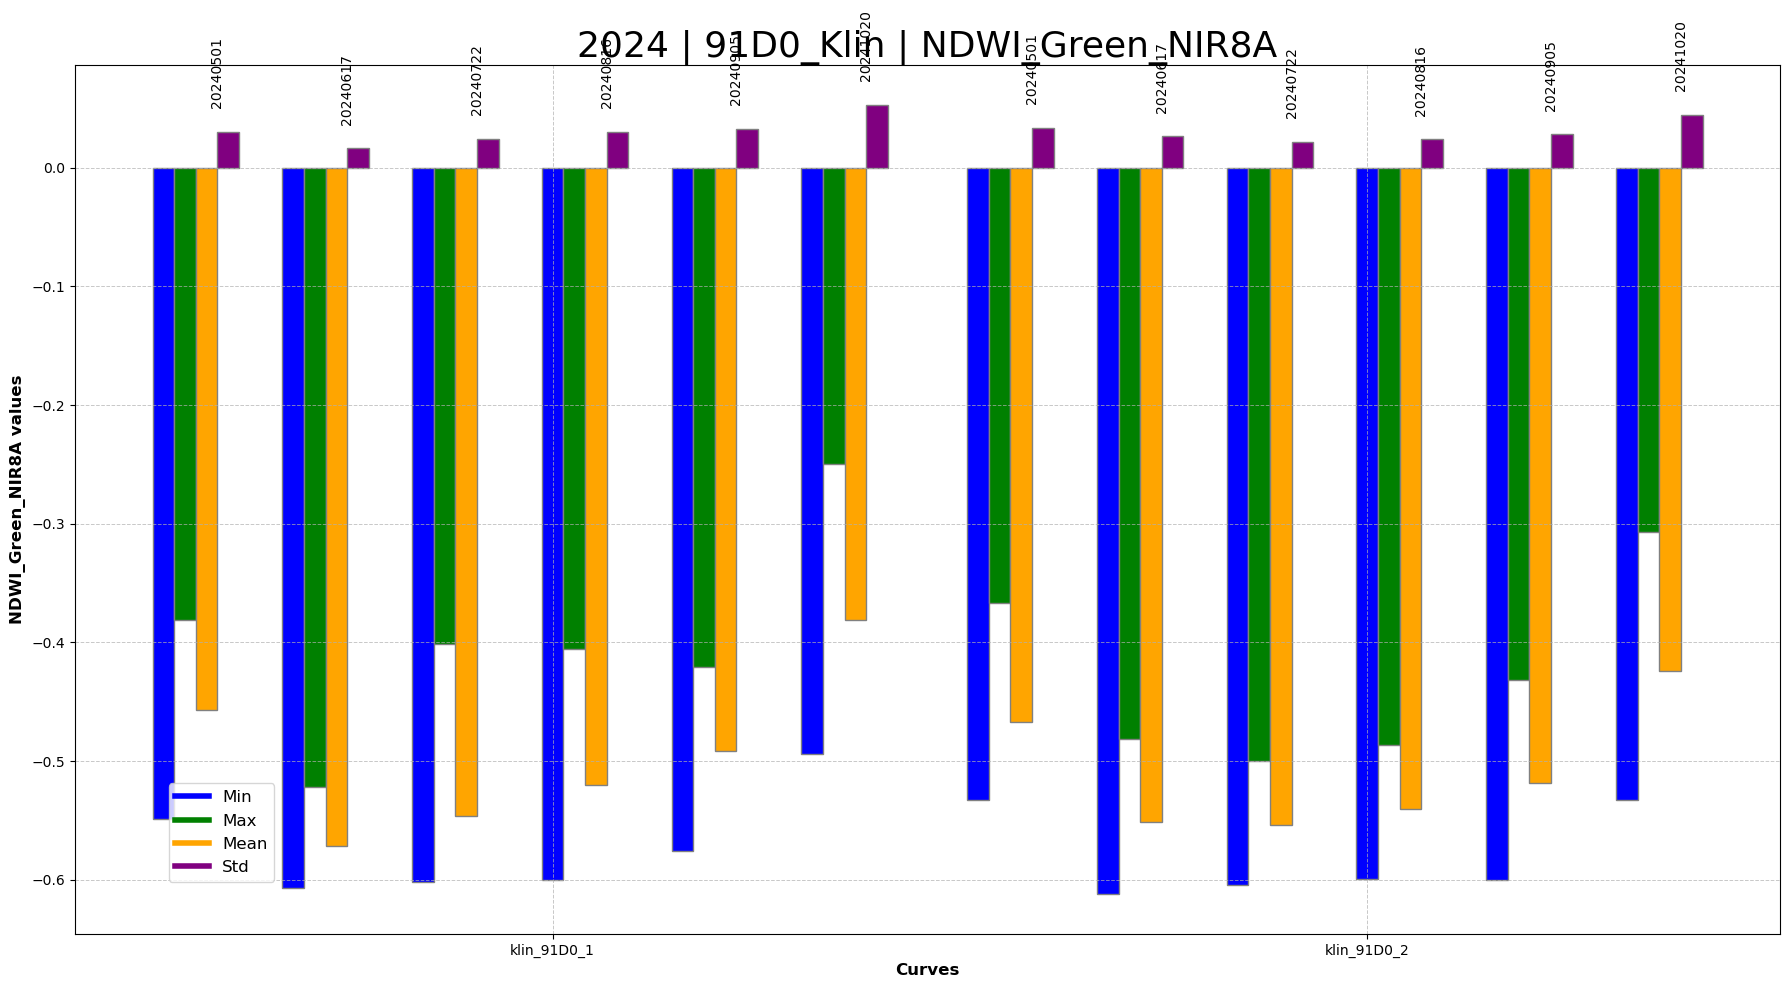

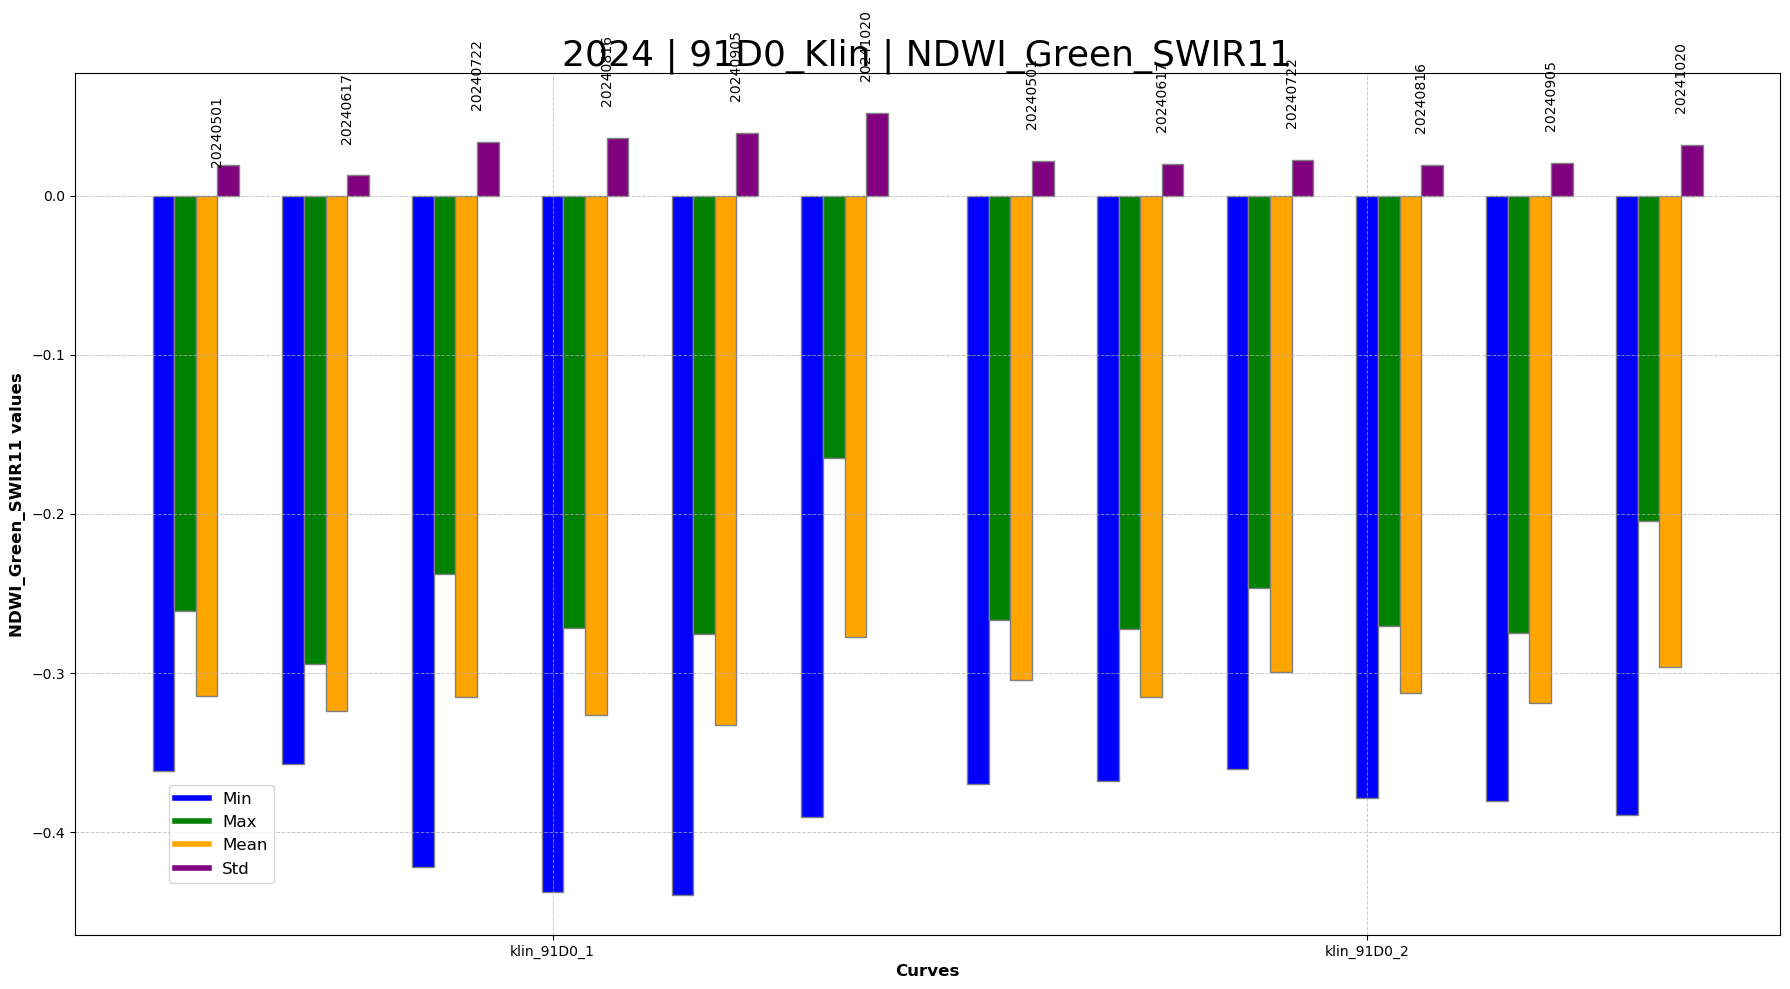

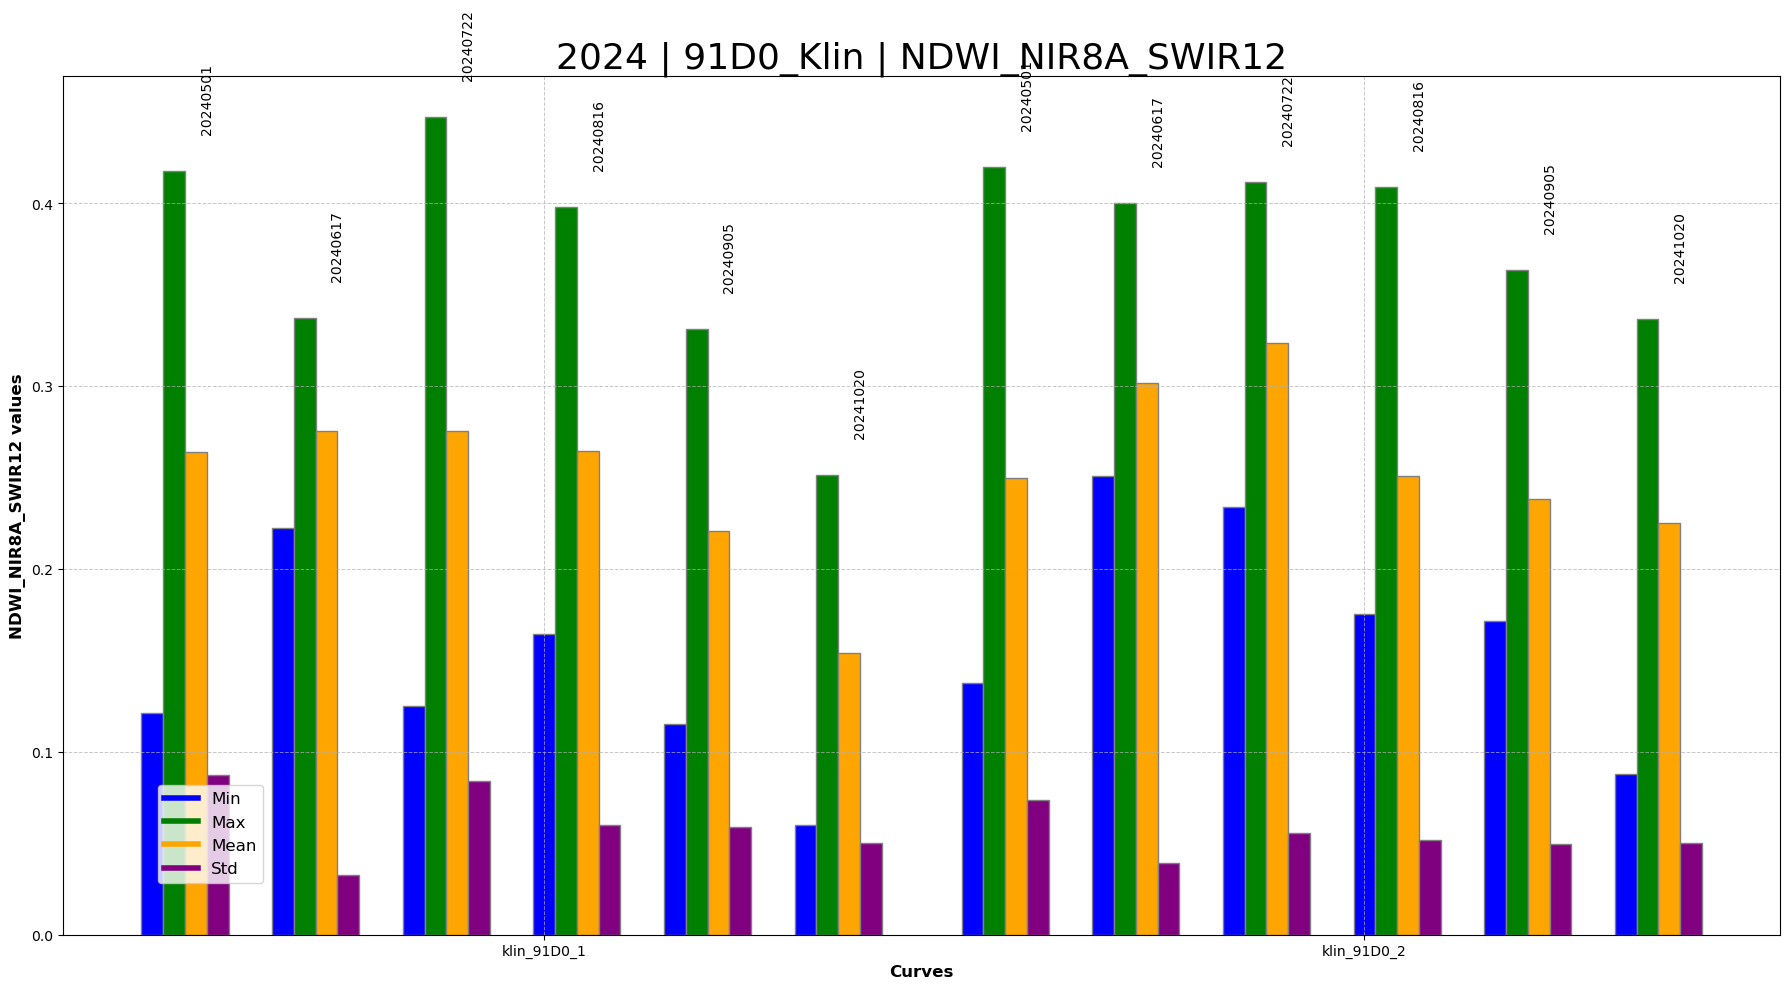

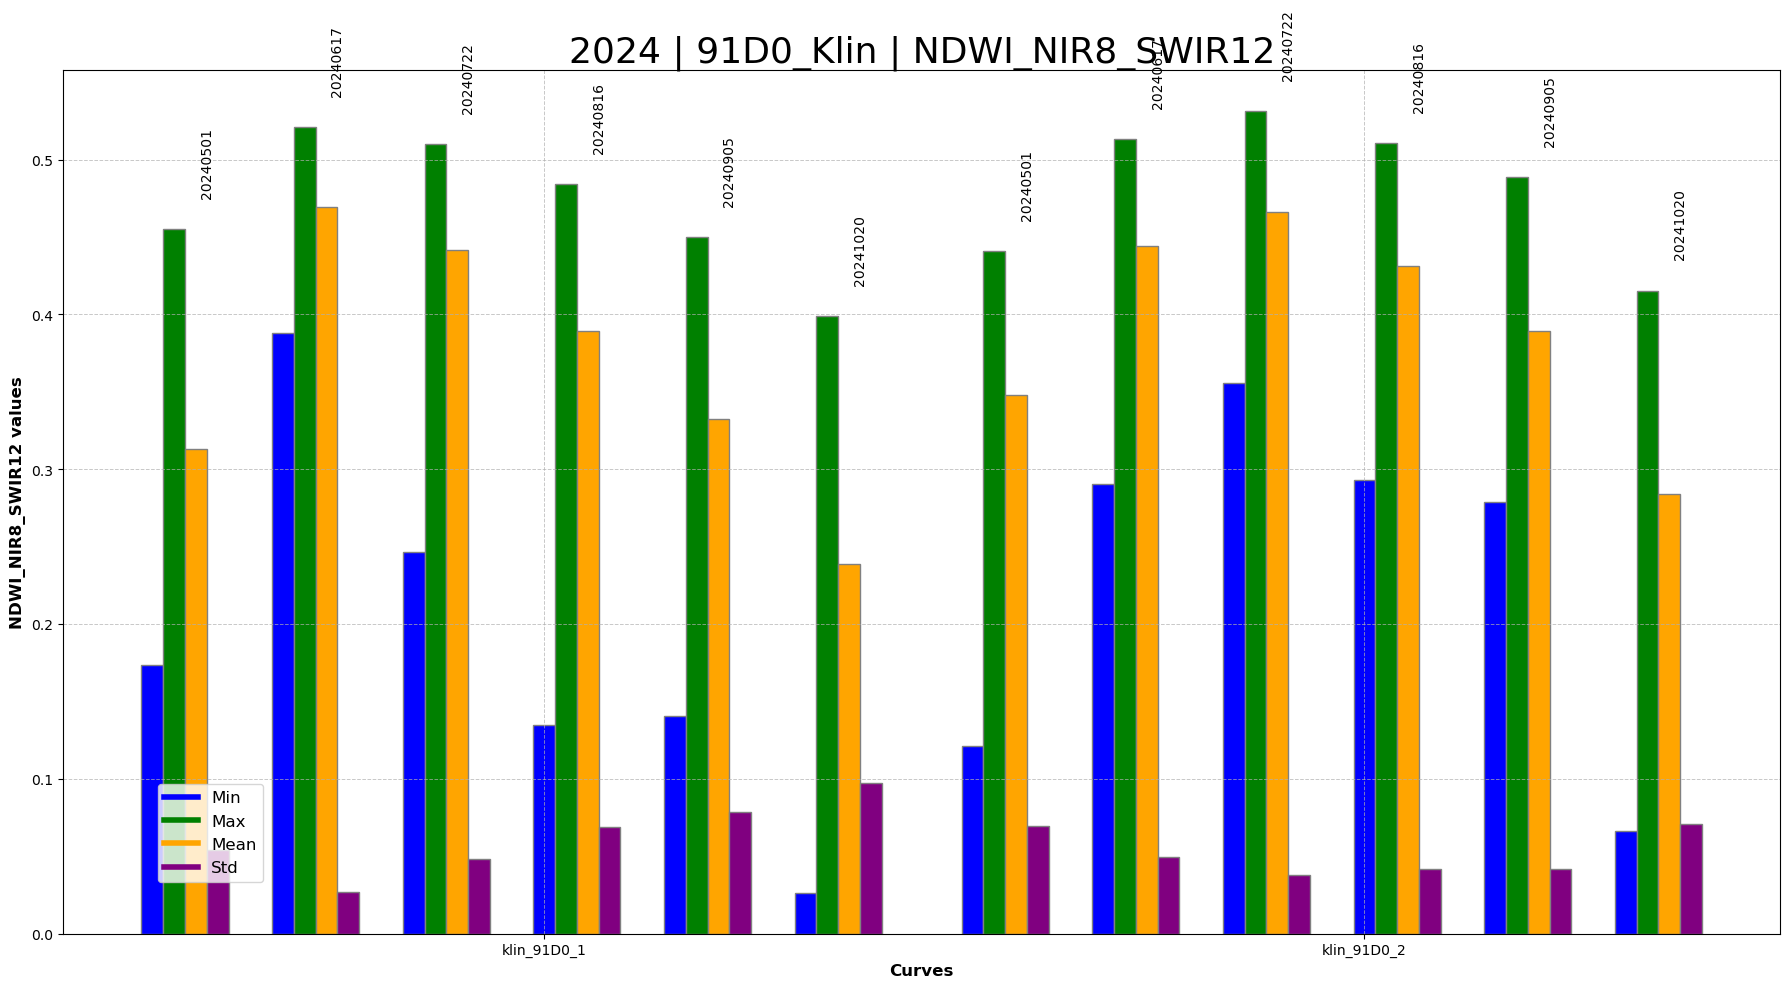

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# DIRECTORY PATH
file_path = r'D:\Slaniska\Klin\Klin_data_viz\2024\91D0\2024_91D0_klin_ipynb.xlsx'

df = pd.read_excel(file_path)

df.columns = df.columns.str.strip()

# AKTUALIZUJ NAZVY STLPCOV
required_columns = ['Min', 'Max', 'Mean', 'Std', 'Index', 'Probe', 'Dataset']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # AKTUALIZUJ NAZVY STLPCOV
    df['Min'] = pd.to_numeric(df['Min'], errors='coerce')
    df['Max'] = pd.to_numeric(df['Max'], errors='coerce')
    df['Mean'] = pd.to_numeric(df['Mean'], errors='coerce')
    df['Std'] = pd.to_numeric(df['Std'], errors='coerce')

    print(df.head())

    index_names = df['Index'].unique()

    for index_name in index_names:
        df_filtered = df[df['Index'] == index_name]

        fig, ax = plt.subplots(figsize=(18, 10))

        bar_width = 1.2
        dataset_count = len(df_filtered['Dataset'].unique())
        probe_count = len(df_filtered['Probe'].unique())

        # Calculate the positions of the bars
        index_positions = np.arange(probe_count) * (dataset_count * 6 * bar_width + 2.0)

        # # AKTUALIZUJ NAZVY STLPCOV
        handles = {
            'Min': plt.Line2D([0], [0], color='blue', lw=4),
            'Max': plt.Line2D([0], [0], color='green', lw=4),
            'Mean': plt.Line2D([0], [0], color='orange', lw=4),
            'Std': plt.Line2D([0], [0], color='purple', lw=4)
        }

        for i, probe in enumerate(df_filtered['Probe'].unique()):
            df_probe = df_filtered[df_filtered['Probe'] == probe]

            positions = index_positions[i] + np.array([0, bar_width, 2 * bar_width, 3 * bar_width, 4 * bar_width, 5 * bar_width])

            for j, dataset in enumerate(df_filtered['Dataset'].unique()):
                df_dataset = df_probe[df_probe['Dataset'] == dataset]
                offset = j * (bar_width * 6)  # BAR WIDTH

                # # AKTUALIZUJ NAZVY STLPCOV
                plt.bar(positions[0] + offset, df_dataset['Min'], color='blue', width=bar_width, edgecolor='grey', label=f'Min ({dataset})' if i == 0 else "")
                plt.bar(positions[1] + offset, df_dataset['Max'], color='green', width=bar_width, edgecolor='grey', label=f'Max ({dataset})' if i == 0 else "")
                plt.bar(positions[2] + offset, df_dataset['Mean'], color='orange', width=bar_width, edgecolor='grey', label=f'Mean ({dataset})' if i == 0 else "")
                plt.bar(positions[3] + offset, df_dataset['Std'], color='purple', width=bar_width, edgecolor='grey', label=f'Std ({dataset})' if i == 0 else "")

                # # AKTUALIZUJ NAZVY STLPCOV
                min_y_value = df_dataset[['Min', 'Max', 'Mean', 'Std']].min().min()
                max_y_value = df_dataset[['Min', 'Max', 'Mean', 'Std']].max().max()

                if pd.notna(min_y_value) and pd.notna(max_y_value):
                    dataset_label_pos = index_positions[i] + (j * (bar_width * 6) + 2.5 * bar_width)

                    if max_y_value > 0:
                        text_y_position = max_y_value + 0.02
                        va_setting = 'bottom'
                    else:
                        text_y_position = min_y_value - 0.02
                        va_setting = 'top'

                    y_limit = plt.gca().get_ylim()
                    if text_y_position < y_limit[0]:
                        text_y_position = y_limit[0] + 0.02
                    elif text_y_position > y_limit[1]:
                        text_y_position = y_limit[1] - 0.02

                    bar_name_fontsize = 10 # FONTSIZE SETTINGS
                    plt.text(dataset_label_pos, text_y_position, dataset, ha='center', va=va_setting, rotation=90, fontsize=bar_name_fontsize) # FONTSIZE SETTINGS

        plt.xlabel('Curves', fontweight='bold', fontsize=12)  # FONTSIZE SETTINGS
        plt.ylabel(f'{index_name} values', fontweight='bold', fontsize=12) # FONTSIZE SETTINGS
        plt.title(f'2024 | 91D0_Klin | {index_name}', fontsize=26) # FONTSIZE SETTINGS A NAZOV GRAFU

        xticks_pos = index_positions + (dataset_count * bar_width * 3)
        xticks_labels = df_filtered['Probe'].unique()
        plt.xticks(xticks_pos, xticks_labels, rotation=0, fontsize=10) # FONTSIZE SETTINGS

        plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

        plt.legend(handles.values(), handles.keys(), bbox_to_anchor=(0.05, 0.05), loc='lower left', fontsize=12)

        plt.tight_layout()
        plt.show()

GRAPHS_SAVING

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# DIRECTORY PATH
file_path = r'D:\Slaniska\Klin\Klin_data_viz\2024\7230\2024_7230_klin_ipynb.xlsx'
save_dir = r'D:\Slaniska\Klin\Klin_data_viz\2024\7230\Graphs\\'

os.makedirs(save_dir, exist_ok=True)

df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()

# CHECK REQUIRED COLUMNS
required_columns = ['Min', 'Max', 'Mean', 'Std', 'Index', 'Probe', 'Dataset']
missing_columns = [col for col in required_columns if col not in df.columns]

# CHECK REQUIRED COLUMNS
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    df['Min'] = pd.to_numeric(df['Min'], errors='coerce')
    df['Max'] = pd.to_numeric(df['Max'], errors='coerce')
    df['Mean'] = pd.to_numeric(df['Mean'], errors='coerce')
    df['Std'] = pd.to_numeric(df['Std'], errors='coerce')

    print(df.head())

    index_names = df['Index'].unique()

    for index_name in index_names:
        df_filtered = df[df['Index'] == index_name]

        fig, ax = plt.subplots(figsize=(18, 10))
        bar_width = 1.2
        dataset_count = len(df_filtered['Dataset'].unique())
        probe_count = len(df_filtered['Probe'].unique())

        # CHECK REQUIRED COLUMNS
        index_positions = np.arange(probe_count) * (dataset_count * 6 * bar_width + 2.0)

        handles = {
            'Min': plt.Line2D([0], [0], color='blue', lw=4),
            'Max': plt.Line2D([0], [0], color='green', lw=4),
            'Mean': plt.Line2D([0], [0], color='orange', lw=4),
            'Std': plt.Line2D([0], [0], color='purple', lw=4)
        }

        for i, probe in enumerate(df_filtered['Probe'].unique()):
            df_probe = df_filtered[df_filtered['Probe'] == probe]
            positions = index_positions[i] + np.array([0, bar_width, 2 * bar_width, 3 * bar_width, 4 * bar_width, 5 * bar_width])

            for j, dataset in enumerate(df_filtered['Dataset'].unique()):
                df_dataset = df_probe[df_probe['Dataset'] == dataset]
                offset = j * (bar_width * 6)

                # CHECK REQUIRED COLUMNS
                plt.bar(positions[0] + offset, df_dataset['Min'], color='blue', width=bar_width, edgecolor='grey', label=f'Min ({dataset})' if i == 0 else "")
                plt.bar(positions[1] + offset, df_dataset['Max'], color='green', width=bar_width, edgecolor='grey', label=f'Max ({dataset})' if i == 0 else "")
                plt.bar(positions[2] + offset, df_dataset['Mean'], color='orange', width=bar_width, edgecolor='grey', label=f'Mean ({dataset})' if i == 0 else "")
                plt.bar(positions[3] + offset, df_dataset['Std'], color='purple', width=bar_width, edgecolor='grey', label=f'Std ({dataset})' if i == 0 else "")

                # CHECK REQUIRED COLUMNS
                min_y_value = df_dataset[['Min', 'Max', 'Mean', 'Std']].min().min()
                max_y_value = df_dataset[['Min', 'Max', 'Mean', 'Std']].max().max()

                if pd.notna(min_y_value) and pd.notna(max_y_value):
                    dataset_label_pos = index_positions[i] + (j * (bar_width * 6) + 2.5 * bar_width)
                    text_y_position = max_y_value + 0.02 if max_y_value > 0 else min_y_value - 0.02
                    va_setting = 'bottom' if max_y_value > 0 else 'top'

                    y_limit = plt.gca().get_ylim()
                    text_y_position = max(y_limit[0] + 0.02, min(y_limit[1] - 0.02, text_y_position))
                    plt.text(dataset_label_pos, text_y_position, dataset, ha='center', va=va_setting, rotation=90, fontsize=10)
                    
        # CHECK TITLE
        plt.xlabel('Curves', fontweight='bold', fontsize=12)
        plt.ylabel(f'{index_name} values', fontweight='bold', fontsize=12)
        plt.title(f'2024 | 7230_Klin | {index_name}', fontsize=26) # CHECK TITLE

        xticks_pos = index_positions + (dataset_count * bar_width * 3)
        xticks_labels = df_filtered['Probe'].unique()
        plt.xticks(xticks_pos, xticks_labels, rotation=0, fontsize=10)

        plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
        plt.legend(handles.values(), handles.keys(), bbox_to_anchor=(0.05, 0.05), loc='lower left', fontsize=12)

        plt.tight_layout()

        # CHECK TITLE
        save_path = os.path.join(save_dir, f'2024_7230_Klin_{index_name}.png')
        plt.savefig(save_path, format='png', dpi=300)
        plt.close()

    print(f"All graphs saved in: {save_dir}")

    Dataset        Probe     Min     Max     Mean      Std Index
0  20240501  klin_7230_1  1167.0  1204.0  1186.33  15.1511   B02
1  20240501  klin_7230_2  1205.0  1205.0  1205.00   0.0000   B02
2  20240501  klin_7230_3  1230.0  1230.0  1230.00   0.0000   B02
3  20240501  klin_7230_4  1262.0  1264.0  1263.00   1.0000   B02
4  20240501  klin_7230_5  1190.0  1190.0  1190.00   0.0000   B02
All graphs saved in: D:\Slaniska\Klin\Klin_data_viz\2024\7230\Graphs\\
